In [118]:
import pandas as pd
import numpy as np

In [119]:
# most important number
important_number = np.pow(2, 13)

# Read data from source file

In [120]:
file_path = "manipulating_file.parquet"

In [121]:
data = np.fromfile(file_path, dtype=np.uint8)

In [122]:
len_of_data = len(data)

In [123]:
slices = [data[i : i + important_number] for i in range(0, len_of_data, important_number)]
pad_set = [np.uint8(0) for i in range(0, important_number - len(slices[-1]))]

slices[-1] = np.concatenate((slices[-1], pad_set))

In [124]:
result = np.array(object=[], dtype=np.uint16)

In [125]:
for slice in slices:
    if len(result) < important_number:
        result = slice
    else:
        result += slice

# np.set_printoptions(threshold=np.inf)

In [126]:
print(result)
print(result.max())

[ 24 122  24 ...  62   1  19]
255


# Plot the dataset

In [127]:
import matplotlib.pyplot as plt

In [128]:
time = np.arange(0, 1, step=1/len(result))

In [129]:
# Chuẩn hóa result

normalized_result = (result - result.min()) / (result.max() - result.min())

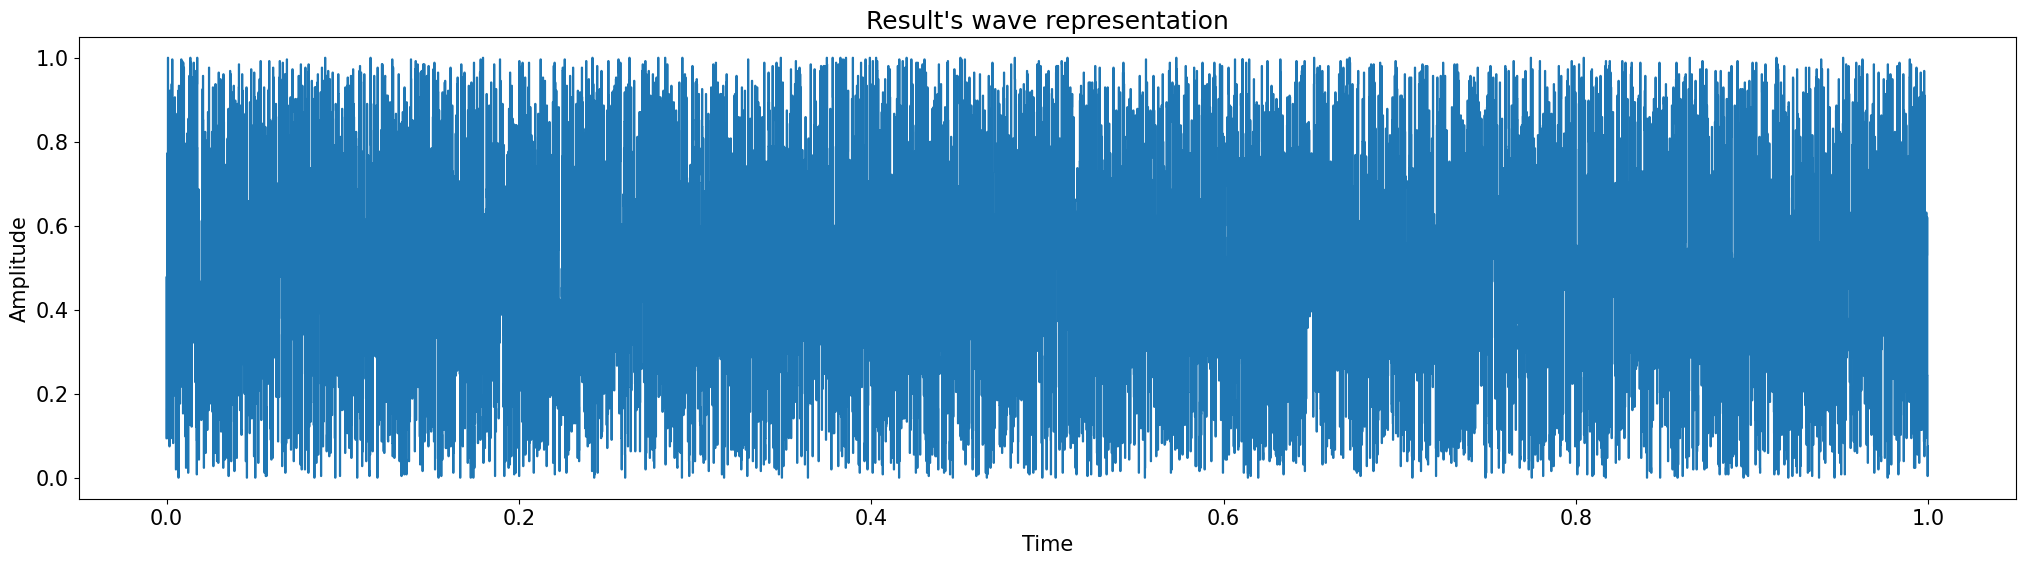

In [130]:
plt.figure(figsize=(25, 6))
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (23, 4)
plt.title("Result's wave representation")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.step(time, normalized_result)

In [131]:
from numpy import fft

In [132]:
fft_result = fft.fft(normalized_result)
fft_frequency = fft.fftfreq(len(normalized_result), d=1/len(normalized_result))

<StemContainer object of 3 artists>

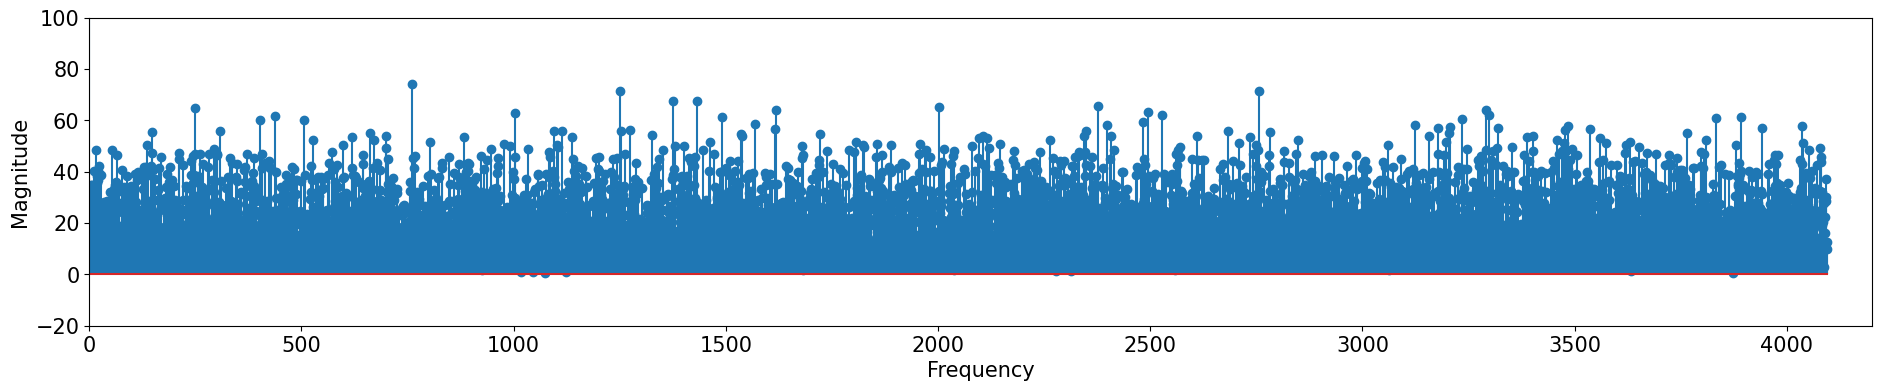

In [156]:
plt.ylabel("Magnitude")
plt.xlabel("Frequency")
plt.ylim(top=100, bottom = -20)
plt.xlim(left=0, right=4200)
plt.stem(fft_frequency, np.abs(fft_result))